# Section I. Main

### Load libraries, functions, palette, theme

In [1]:
# load libraries and palette
%run __libraries.ipynb

In [2]:
# load functions
# from __functions import *
%run __functions.ipynb

In [3]:
# start stopwatch
start = stopwatch_start()

### Variables

In [4]:
path_img = 'docs/img/'

In [5]:
path_files = 'files'

In [6]:
path_excel_csv = 'excel-csv'

### Load Files

In [7]:
economics_data = loadit('economics_data', path=path_files, create_empty_dict=True)

# Consumer prices growth

In [10]:
prices_producers_food_growth = economics_data['prices_producers_food_growth'].copy()

In [8]:
prices_consumers_food_growth = economics_data['prices_consumers_food_growth'].copy()

В 2022 году изменена номенклатура для хлеба.  

В 2021:
- хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг
- хлеб и булочные изделия из пшеничной муки высшего сорта, кг


В 2022:
- хлеб и булочные изделия из пшеничной муки различных сортов, кг

В конечном итоге, цена для 2021 года считается как средняя от  'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг' 
и 'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'. На графике цена за 2021 год обозначены светлым тоном.

In [11]:
prices_producers_columns = [
    'пшеница', 'крупный рогатый скот', 'свиньи', 'птица сельскохозяйственная живая',
    'молоко сырое крупного рогатого скота', 'овощи', 'яйца куриные в скорлупе свежие'
]

In [12]:
prices_consumers_columns = [
    'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг', 
    'хлеб и булочные изделия из пшеничной муки высшего сорта, кг',
    'хлеб и булочные изделия из пшеничной муки различных сортов, кг',
    'говядина (кроме бескостного мяса), кг', 'говядина бескостная, кг',
    'свинина (кроме бескостного мяса), кг', 'свинина бескостная, кг',
    'куры охлажденные и мороженые, кг', 
    'молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л',
    'сыры сычужные твердые и мягкие, кг', 'сыры твердые, полутвердые и мягкие, кг',
    'сметана, кг', 'йогурт, 125 г', 'йогурт, кг', 'масло сливочное, кг', 
    'творог нежирный, кг', 'творог жирный, кг',
    'картофель, кг', 'огурцы свежие, кг', 'помидоры свежие, кг',
    'лук репчатый, кг', 'морковь, кг',
    'яйца куриные, 10 шт.'
]

In [15]:
prices_producers_food_growth = prices_producers_food_growth[prices_producers_columns].copy()

In [16]:
prices_consumers_food_growth = prices_consumers_food_growth[prices_consumers_columns].copy()

### Хлеб

In [17]:
prices_producers_food_growth['пшеница']

January 2024     1.000000
February 2024    1.009059
March 2024       0.996348
April 2024       1.004597
Name: пшеница, dtype: float64

In [18]:
prices_producers_food_growth['пшеница']

January 2024     1.000000
February 2024    1.009059
March 2024       0.996348
April 2024       1.004597
Name: пшеница, dtype: float64

In [22]:
xtickaliases = pl_tickaliases(arange(2021, 2024, True))

In [ ]:
prices_growth['']

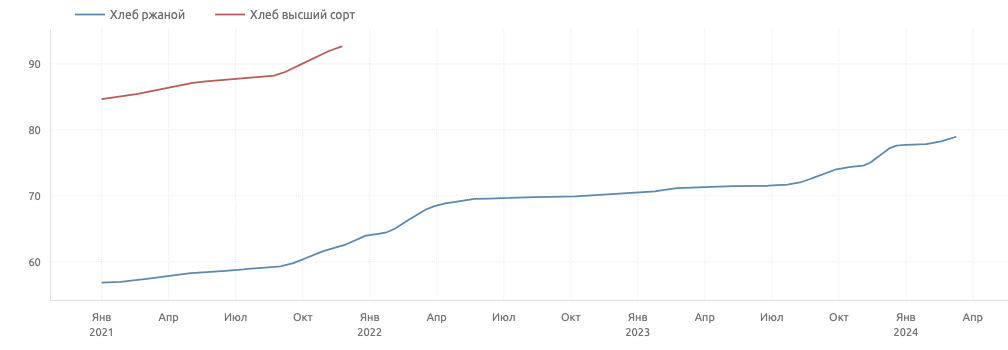

In [20]:
fig = pl_figure(figsize=(800, 350))

pl_plot(
    go.Scatter(
        x=smoothed(prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'], datetime_index=True).index,
        y=smoothed(prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'], datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[2], hoverinfo='skip',
        name='Хлеб ржаной'), fig)


pl_plot(
    go.Scatter(
        x=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'].index,
        y=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[2], showlegend=False, name='Хлеб ржаной'))

pl_plot(
    go.Scatter(
        x=smoothed(prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'], datetime_index=True).index,
        y=smoothed(prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'], datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip',
        name='Хлеб высший сорт'), fig)


pl_plot(
    go.Scatter(
        x=prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].index,
        y=prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[1],
        showlegend=False, name='Хлеб высший сорт'))

fig.update_layout(
    hoverlabel=dict(
            bgcolor='rgba(255,255,255,0.85)',
            bordercolor='#C7C7C7',
            font=dict(color='#606060')),
)

fig.update_xaxes(
    tick0=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'].index[0],
    dtick=86400000*31*3,
    tickformat="%b<br>%Y",
    labelalias=xtickaliases
)

fig.show(config=config)

### Execution time

In [15]:
stopwatch_stop(start)

Execution time: 0:00:01
